In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
data = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")

In [4]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


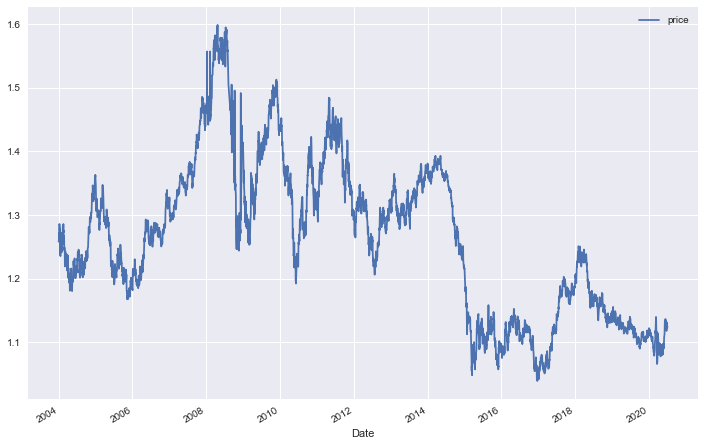

In [5]:
data.plot(figsize=(12,8))
plt.show()

# EMA vs SMA

In [6]:
window = 50

In [7]:
data.price.ewm(span=window).mean()

Date
2004-01-01    1.258194
2004-01-02    1.258194
2004-01-05    1.261836
2004-01-06    1.264559
2004-01-07    1.264458
                ...   
2020-06-24    1.109674
2020-06-25    1.110279
2020-06-26    1.110746
2020-06-29    1.111211
2020-06-30    1.111741
Name: price, Length: 4275, dtype: float64

In [8]:
data["EMA_S"] = data.price.ewm(span=window, min_periods=window).mean()

In [9]:
data["SMA_S"] = data.price.rolling(window).mean()

In [10]:
data

,price,EMA_S,SMA_S
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.101794
2020-06-25,1.125087,1.110279,1.102486
2020-06-26,1.122208,1.110746,1.103213


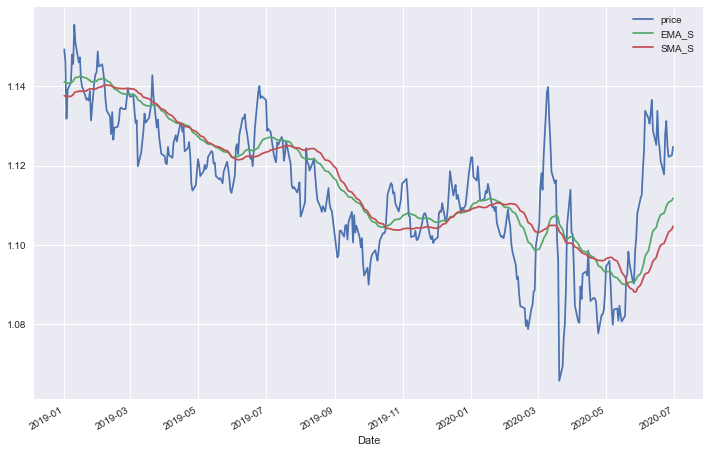

In [11]:
data.loc["2019":].plot(figsize=(12,8))
plt.show()

# EMA crossover strat

In [12]:
data.drop(columns=["EMA_S", "SMA_S"], inplace=True)

In [13]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [14]:
ema_s = 50
ema_l = 200

In [15]:
data["EMA_S"] = data.price.ewm(span=ema_s, min_periods=ema_s).mean()

In [16]:
data["EMA_L"] = data.price.ewm(span=ema_l, min_periods=ema_l).mean()

In [17]:
data

,price,EMA_S,EMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.106470
2020-06-25,1.125087,1.110279,1.106655
2020-06-26,1.122208,1.110746,1.106810


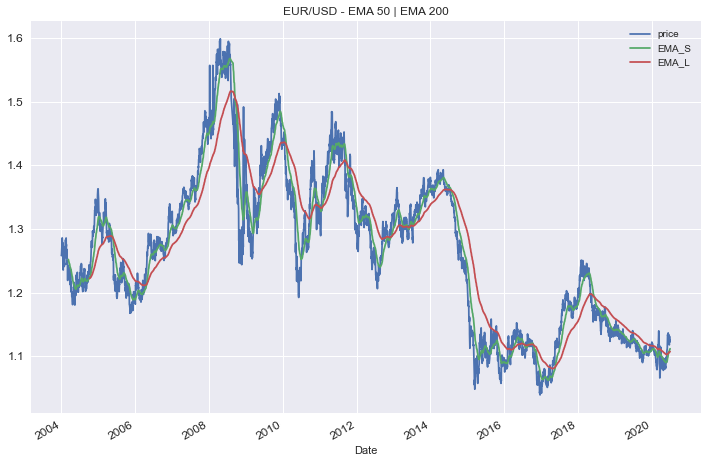

In [19]:
data.plot(figsize=(12,8), title=f"EUR/USD - EMA {ema_s} | EMA {ema_l}", fontsize =12)
plt.show()

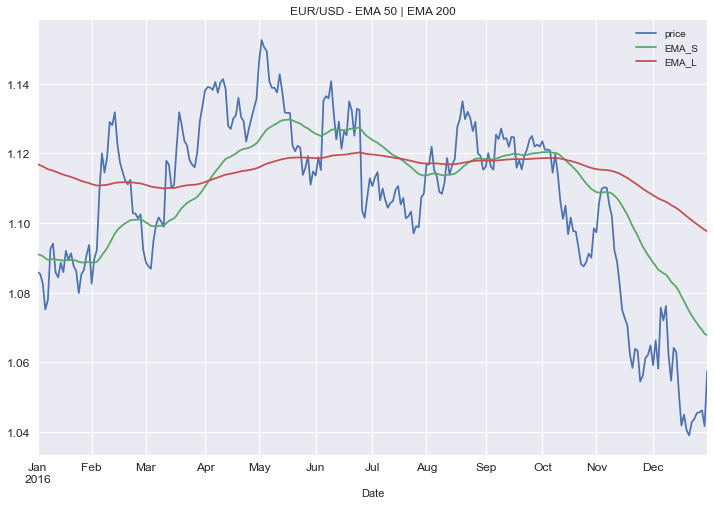

In [20]:
data.loc["2016", ["price", "EMA_S", "EMA_L"]].plot(figsize=(12,8), title=f"EUR/USD - EMA {ema_s} | EMA {ema_l}", fontsize =12)
plt.show()

In [21]:
data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1)

In [22]:
data

,price,EMA_S,EMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1
2020-06-25,1.125087,1.110279,1.106655,1
2020-06-26,1.122208,1.110746,1.106810,1


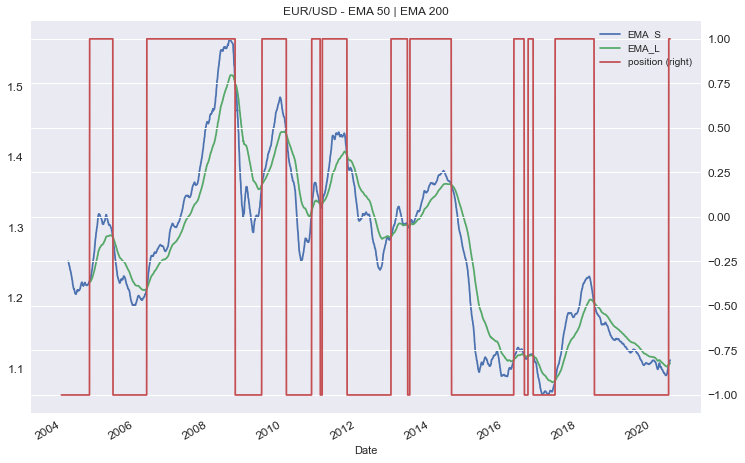

In [23]:
data.loc[:, ["EMA_S", "EMA_L", "position"]].plot(figsize=(12,8), title=f"EUR/USD - EMA {ema_s} | EMA {ema_l}", secondary_y="position", fontsize =12)
plt.show()

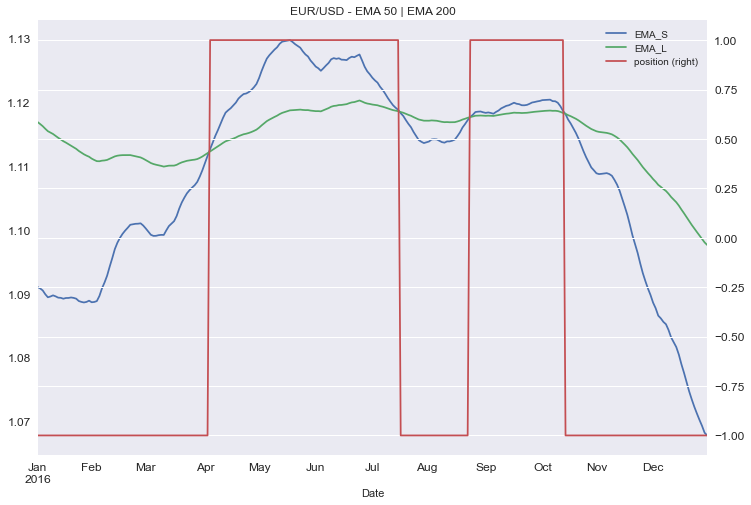

In [24]:
data.loc["2016", ["EMA_S", "EMA_L", "position"]].plot(figsize=(12,8), title=f"EUR/USD - EMA {ema_s} | EMA {ema_l}", secondary_y="position", fontsize =12)
plt.show()

# Vectorized strat backtesting

In [25]:
data

,price,EMA_S,EMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1
2020-06-25,1.125087,1.110279,1.106655,1
2020-06-26,1.122208,1.110746,1.106810,1


In [26]:
# Buy and hold 
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [27]:
data.dropna(inplace=True)

In [28]:
data

,price,EMA_S,EMA_L,position,returns
Date,,,,,
2004-10-06,1.228094,1.223852,1.222221,1,-0.002853
2004-10-07,1.229906,1.224089,1.222309,1,0.001475
2004-10-08,1.241003,1.224753,1.222524,1,0.008982
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102
...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562


In [29]:
# The actual strat
# The positions are determined at end of the day, using the closing price of the day 
data["strategy"] = data.position.shift(1) * data["returns"]

In [30]:
data

,price,EMA_S,EMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.223852,1.222221,1,-0.002853,NaN
2004-10-07,1.229906,1.224089,1.222309,1,0.001475,0.001475
2004-10-08,1.241003,1.224753,1.222524,1,0.008982,0.008982
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095,-0.002095
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102,-0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892,0.002892
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449,-0.005449
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562,-0.002562


In [31]:
data.dropna(inplace=True)

In [32]:
# trading cost
ptc = 0.00007

In [33]:
data["trades"] = data.position.diff().fillna(0).abs()

In [34]:
data.trades.value_counts()

0.0    4055
2.0      20
Name: trades, dtype: int64

In [35]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [36]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [37]:
data

,price,EMA_S,EMA_L,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,
2004-10-07,1.229906,1.224089,1.222309,1,0.001475,0.001475,0.0,0.001475,1.001476,1.001476,1.001476
2004-10-08,1.241003,1.224753,1.222524,1,0.008982,0.008982,0.0,0.008982,1.010511,1.010511,1.010511
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095,-0.002095,0.0,-0.002095,1.008396,1.008396,1.008396
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102,-0.005102,0.0,-0.005102,1.003265,1.003265,1.003265
2004-10-13,1.234903,1.225922,1.222951,1,0.002270,0.002270,0.0,0.002270,1.005545,1.005545,1.005545
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892,0.002892,0.0,0.002892,0.921130,1.283363,1.279774
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449,-0.005449,0.0,-0.005449,0.916125,1.276389,1.272820
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562,-0.002562,0.0,-0.002562,0.913781,1.273123,1.269563


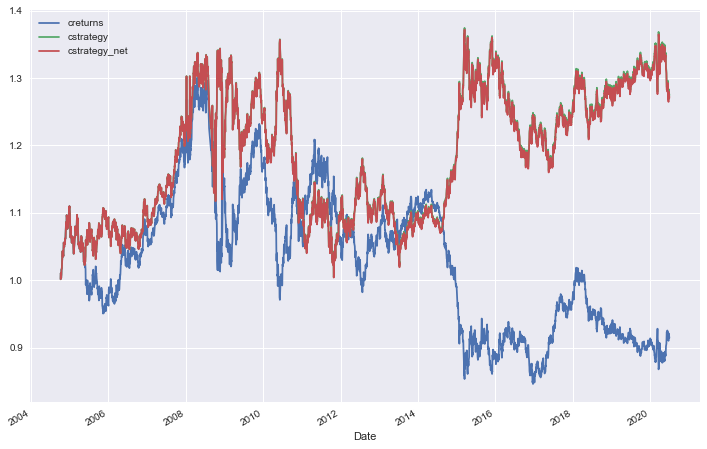

In [40]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize=(12,8))
plt.show()

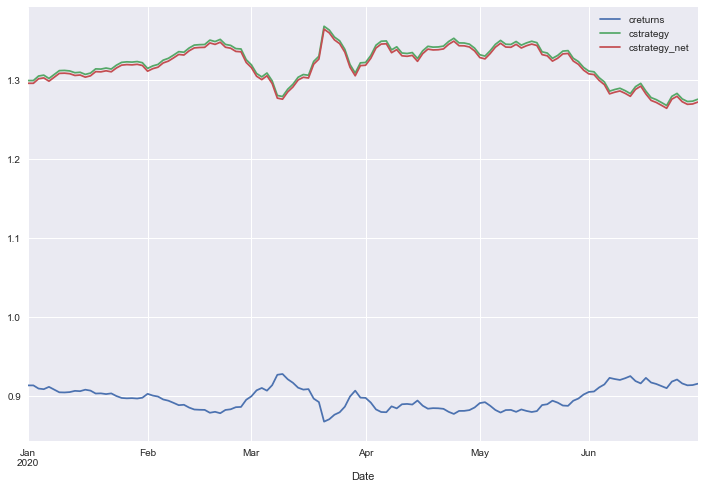

In [41]:
data.loc["2020",["creturns", "cstrategy", "cstrategy_net"]].plot(figsize=(12,8))
plt.show()

# EMA Backtester class

In [42]:
from EMABacktester import EMABacktester as EMA

In [43]:
test = EMA("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30", ptc)

In [44]:
test

EMABacktester(symbol = EURUSD=X, EMA_S = 50, EMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [45]:
test.test_strategy()

(1.272405, 0.356579)

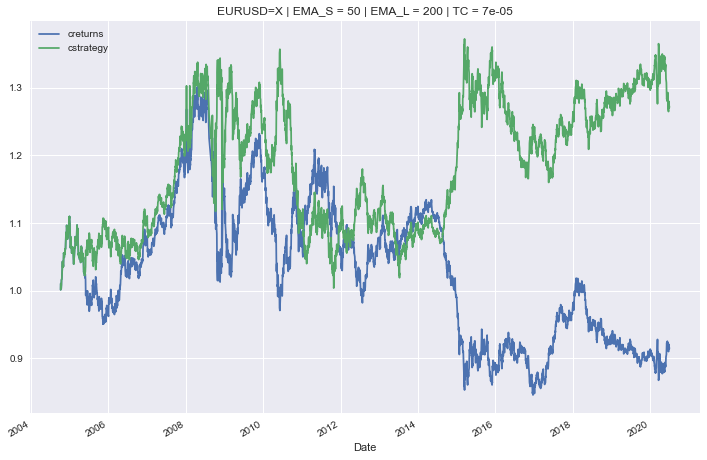

In [46]:
test.plot_results()

In [47]:
test.optimize_parameters((25, 75, 1), (100, 200, 1))

(array([ 36., 168.]), 1.661631)

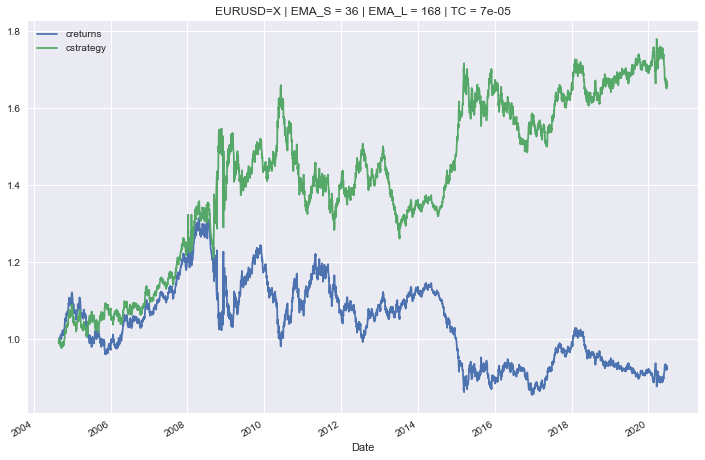

In [48]:
test.plot_results()

In [49]:
# EMA of 1 is equal to the price itself
# Special case price/ema crossover test
test.set_parameters(1,50)

In [50]:
test.test_strategy()

(0.507159, -0.412333)

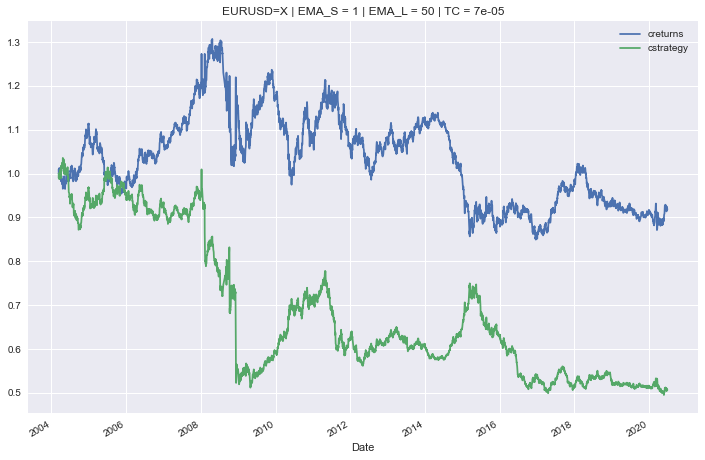

In [51]:
test.plot_results()

In [52]:
test.results.trades.value_counts()

0.0    3858
2.0     367
Name: trades, dtype: int64